# Nested clustering of SST

This notebook demonstrates how to perform nested clustering analysis on ocean data, where we first identify major clusters and then subdivide each cluster into smaller sub-clusters.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import warnings
from nested_clustering import perform_nested_clustering, plot_nested_clusters, analyze_cluster_patterns, create_cluster_time_series_df

warnings.filterwarnings('ignore')
data = xr.open_dataset('../data/MODIS/processed/sst_anomaly_daily_2002_2025.nc')

n_clusters_outer = 4  
n_clusters_inner = 4  

cluster_results = perform_nested_clustering(
    data['sst'].values,
    data['lon'].values,  
    data['lat'].values, 
    n_clusters_outer=n_clusters_outer,
    n_clusters_inner=n_clusters_inner
)

/Users/daniela/Documents/suyana/peru_produccion/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



=== Starting Nested Clustering Process ===
Input data shape: (8266, 396, 408)
Number of outer clusters: 4
Number of inner clusters: 4

Reshaped data shape: (8266, 161568)

Valid points shape: (396, 408)
Number of valid points: 82521

Fetching administrative boundaries...
Ocean points: 73917

Final valid points: 73916

Clean data shape: (8266, 73916)

Handling NaN values...

Standardizing data...
Scaled data shape: (8266, 73916)

Performing outer clustering...
Outer clusters shape: (73916,)
Outer cluster distribution:
  Cluster 0: 18497 points
  Cluster 1: 12652 points
  Cluster 2: 22500 points
  Cluster 3: 20267 points

Performing inner clustering...

Inner clusters for outer cluster 0:
  Subcluster 0: 3797 points
  Subcluster 1: 4808 points
  Subcluster 2: 6084 points
  Subcluster 3: 3808 points

Inner clusters for outer cluster 1:
  Subcluster 0: 4284 points
  Subcluster 1: 3200 points
  Subcluster 2: 2295 points
  Subcluster 3: 2873 points

Inner clusters for outer cluster 2:
  Sub

## Visualize the nested clusters

The following plot shows each main cluster separately, with its sub-clusters highlighted in different colors.


=== Starting Cluster Visualization ===
Input data shape: (8266, 396, 408)
Number of outer clusters: 4
Number of inner clusters: 4

Valid mask shape: (396, 408)
Number of valid points: 73916
Spatial clusters shape: (396, 408)

Cluster visualization statistics:
Number of non-NaN values: 73916
Unique cluster values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]

Number of colors in colormap: 16

Plotting ocean background...

Plotting clusters...

Adding map features...

Map extent:
Longitude: -84.5 to -67.5
Latitude: -19.5 to -3.0

Adding colorbar...

=== Cluster Visualization Complete ===


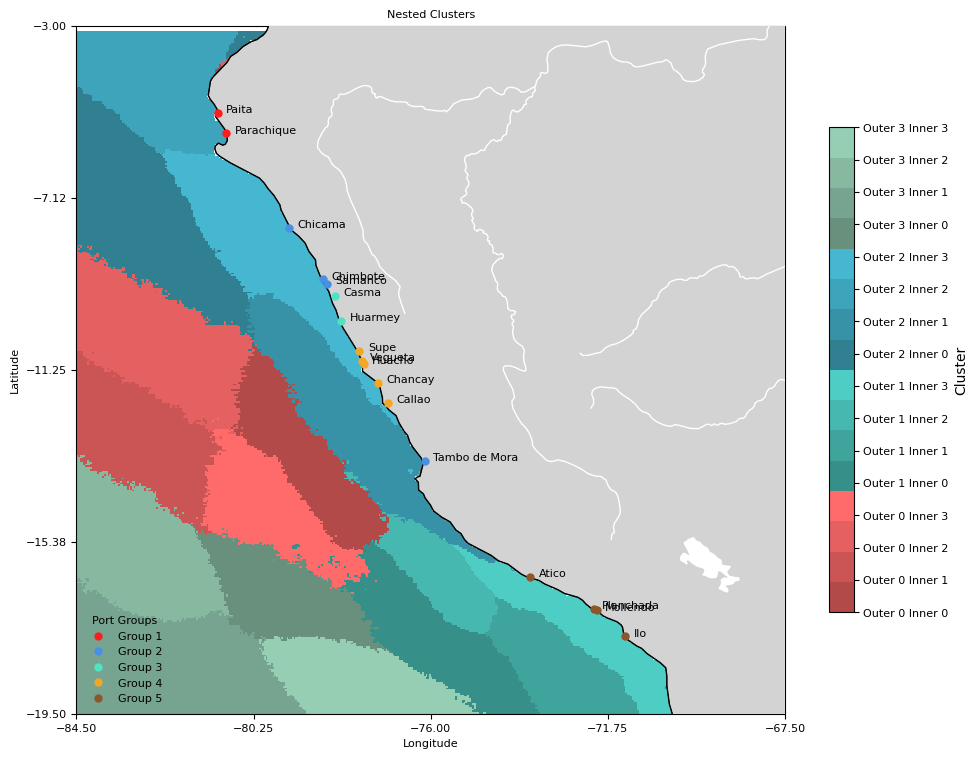

In [2]:
fig = plot_nested_clusters(cluster_results, data, n_clusters_outer, n_clusters_inner)
plt.show()

## Analyze temporal patterns

The following plot shows the temporal evolution of each nested cluster.


=== Starting Cluster Pattern Analysis ===
Number of outer clusters: 4
Number of inner clusters: 4
Total number of clusters: 16

Processing outer cluster 0
  Processing inner cluster 0 (total index: 0)
    Number of points in cluster: 3797
    Mean time series shape: (8266,)
  Processing inner cluster 1 (total index: 1)
    Number of points in cluster: 4808
    Mean time series shape: (8266,)
  Processing inner cluster 2 (total index: 2)
    Number of points in cluster: 6084
    Mean time series shape: (8266,)
  Processing inner cluster 3 (total index: 3)
    Number of points in cluster: 3808
    Mean time series shape: (8266,)

Processing outer cluster 1
  Processing inner cluster 0 (total index: 4)
    Number of points in cluster: 4284
    Mean time series shape: (8266,)
  Processing inner cluster 1 (total index: 5)
    Number of points in cluster: 3200
    Mean time series shape: (8266,)
  Processing inner cluster 2 (total index: 6)
    Number of points in cluster: 2295
    Mean tim

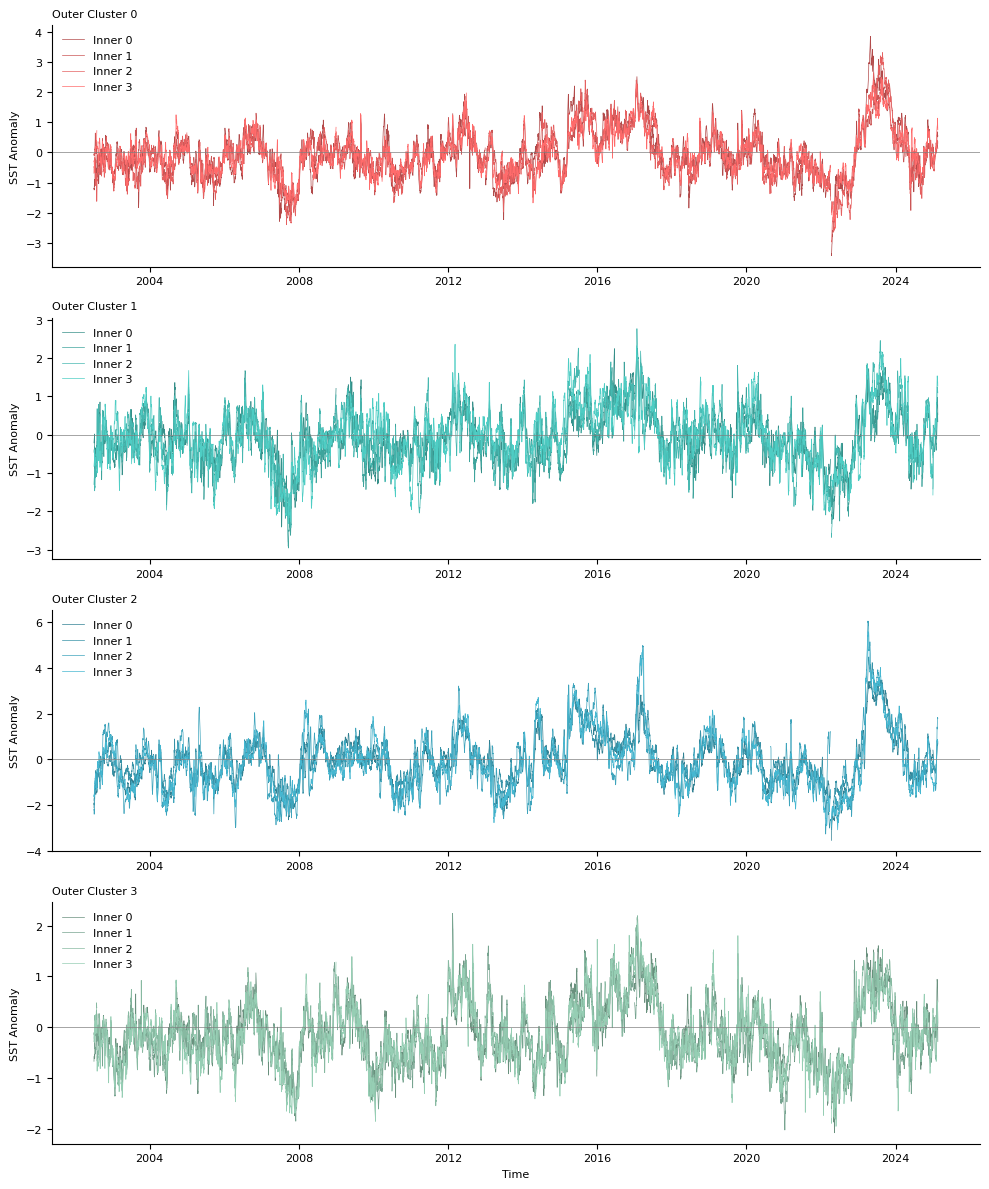

In [3]:
fig = analyze_cluster_patterns(cluster_results, data, data.time, n_clusters_outer, n_clusters_inner)
plt.show()

## Cluster statistics

Let's analyze some basic statistics about the clusters.

In [4]:
# Calculate and display cluster statistics
n_total_clusters = cluster_results['n_clusters_total']

print(f"Total number of clusters: {n_total_clusters}")
print(f"Number of main clusters: {n_clusters_outer}")
print(f"Number of sub-clusters per main cluster: {n_clusters_inner}\n")

for i in range(n_clusters_outer):
    print(f"Main Cluster {i+1}:")
    for j in range(n_clusters_inner):
        cluster_idx = i * n_clusters_inner + j
        mask = cluster_results['spatial_clusters'] == cluster_idx
        n_points = np.sum(mask)
        print(f"  Sub-cluster {j+1}: {n_points} points")
    print()

Total number of clusters: 16
Number of main clusters: 4
Number of sub-clusters per main cluster: 4

Main Cluster 1:
  Sub-cluster 1: 3797 points
  Sub-cluster 2: 4808 points
  Sub-cluster 3: 6084 points
  Sub-cluster 4: 3808 points

Main Cluster 2:
  Sub-cluster 1: 4284 points
  Sub-cluster 2: 3200 points
  Sub-cluster 3: 2295 points
  Sub-cluster 4: 2873 points

Main Cluster 3:
  Sub-cluster 1: 7098 points
  Sub-cluster 2: 5371 points
  Sub-cluster 3: 4939 points
  Sub-cluster 4: 5092 points

Main Cluster 4:
  Sub-cluster 1: 3698 points
  Sub-cluster 2: 7212 points
  Sub-cluster 3: 5420 points
  Sub-cluster 4: 3937 points



In [5]:
df_clusters = create_cluster_time_series_df(
    cluster_results=cluster_results,
    data=data,
    n_clusters_outer=4,  # número de clusters externos
    n_clusters_inner=4   # número de clusters internos
)

In [6]:
df_clusters.to_csv('../data/MODIS/processed/cluster_time_series.csv')